## Load the matplotlib magic and the normal pandas stack

In [282]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
import re

## here we'll set the matplotlib figure size to take up more real estate
pyplot.rcParams['figure.figsize'] = [12, 5]

## Read the data into a dict of dicts

In [283]:
outputFiles = os.listdir('../output')
output = dict()
for outputFile in outputFiles:
    with open("../output/" + outputFile, 'r') as f:
        output[outputFile] = dict()
        for cnt, line in enumerate(f):
            split = line.split()
            if len(split) > 1:
                output[outputFile][split[0]] = pd.Series(split[1:])
            
print output.keys()


['cashier_1000_20.output', 'cashier_1000_14.output', 'cashier_1000_26.output', 'cashier_1000_22.output', 'cashier_1000_6.output', 'cashier_1000_24.output']


## Great, lets take a look at the data! We'll look at the 1000 customer / 6 cashier scenario and create a histogram of the customer shop times.

count    1000.000000
mean        9.770404
std         7.627657
min         1.065700
25%         5.071325
50%         7.507850
75%        12.653200
max        90.016900
dtype: float64

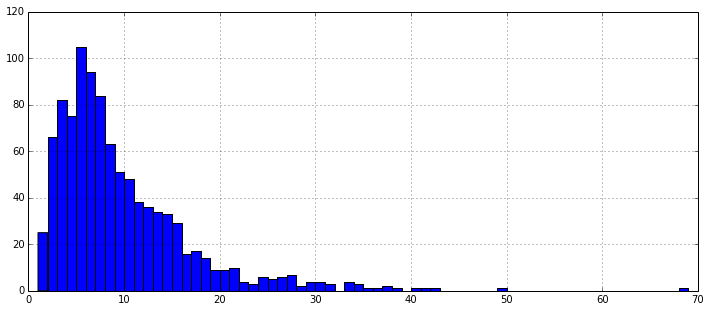

In [284]:
shopTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_SHOP_TIMES_0'].astype(float)
count, division = np.histogram(shopTimes, range(int(shopTimes.min()),int(shopTimes.max()),1))
shopTimes.hist(bins=division)
shopTimes.describe()

## We can see it is a lognormal distribution, with a mean of around 10 minutes and a standard deviation of ~8 minutes. That matches up with our input.

## Lets take a look at entry times.

count    1000.000000
mean      120.299481
std        58.379053
min        18.135000
25%        79.784175
50%       111.235250
75%       146.402350
max       397.121300
dtype: float64

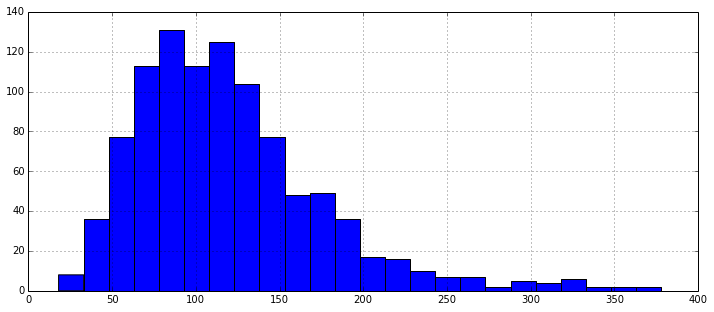

In [285]:
entryTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_ENTRY_TIMES_0'].astype(float)
count, division = np.histogram(entryTimes, range(int(entryTimes.min()),int(entryTimes.max()),15))
entryTimes.hist(bins=division)
entryTimes.describe()

## Again, a lognormal distribution. A mean of 120 minutes with a standard deviation of ~ an hour. So far, so good.

## Lets take a look at the customer wait times

count    1000.000000
mean      134.409607
std        79.001810
min         0.000000
25%        63.572700
50%       142.050750
75%       208.929325
max       243.523100
dtype: float64

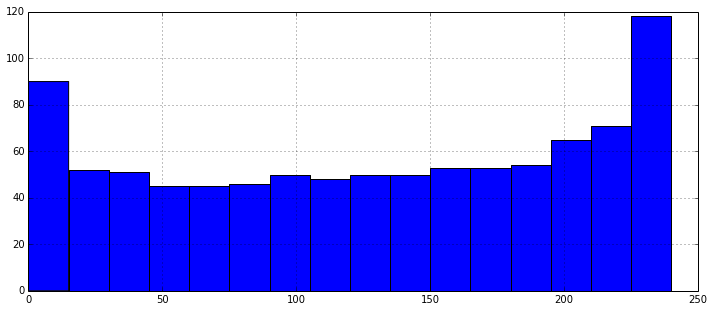

In [288]:
waitTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes, range(int(waitTimes.min()), int(waitTimes.max()), 15))
waitTimes.hist(bins=division)
waitTimes.describe()

## Wow, look at those wait times. A mean wait time of over 2.5 hours. Thats not very realistic; lets take a look at a scenario with more cashiers.

count    1000.000000
mean       72.291202
std        42.949884
min         0.000000
25%        33.222200
50%        80.086000
75%       112.270600
max       127.532900
dtype: float64

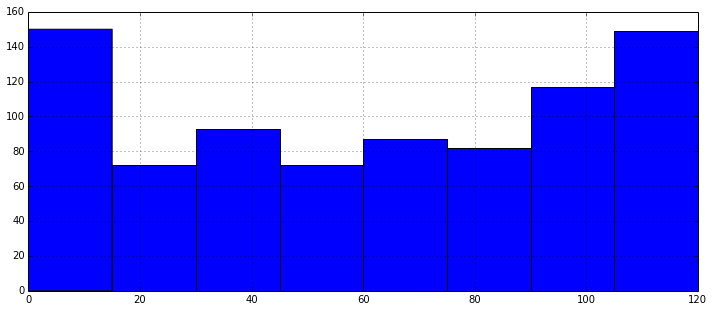

In [290]:
waitTimes_14 = output['cashier_1000_14.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes_14, range(int(waitTimes_14.min()),int(waitTimes_14.max()),15))
waitTimes_14.hist(bins=division)
waitTimes_14.describe()

## Thats a little bit better, but still unreasonable. Over 150 or so people waiting in line for 2.5 hours? Lets add more cashiers.

count    1000.000000
mean        7.270201
std         5.850609
min         0.000000
25%         0.186875
50%         6.949600
75%        12.907425
max        16.381400
dtype: float64

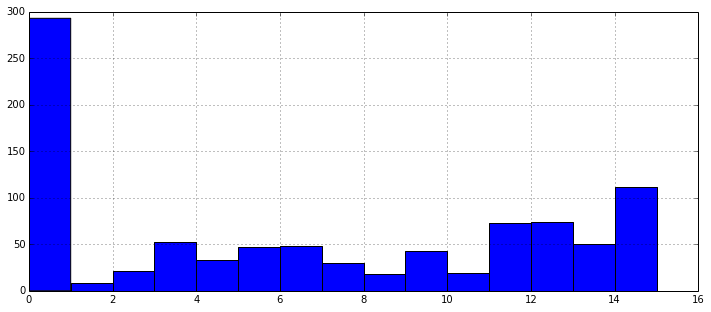

In [291]:
waitTimes_22 = output['cashier_1000_22.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes_22, range(int(waitTimes_22.min()),int(waitTimes_22.max()),1))
waitTimes_22.hist(bins=division)
waitTimes_22.describe()

## Thats much better. A max wait time of 8 minutes, and 75% of customers have a wait time of < 13 minutes. Remember though, these are based off of single runs. Lets run multiples in the next notebook.